In [1]:
#imports
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.signal as signal #signal processing stuff (e.g. filters, hilbert transform, etc.)
import scipy
import struct
import os
#plotting!
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import nelpy.plotting as npl
import nelpy.io.trodes as neltro
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
#nelpy!
import nelpy as nel
import nelpy.plotting as npl
#make the svg
import svgutils.transform as sg
import sys
from IPython.display import SVG, display, Image
#plots show up within jupyter for matplotlib
%matplotlib inline 

/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


In [222]:
# 3SD
sigmuhz = np.arange(1.5,10.25,0.25)
detectionLatencyCalc = []
relativeDetectionLatencyCalc =[]
fpRateCalc = []
tpRateCalc = []
fpPercentCalc = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn3SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn3SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn3SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn3SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc.append(np.loadtxt(OPENME))
detectionLatencyCalc = np.asarray(detectionLatencyCalc)
relativeDetectionLatencyCalc = np.asarray(relativeDetectionLatencyCalc)
fpRateCalc = np.asarray(fpRateCalc)
tpRateCalc = np.asarray(tpRateCalc)
# fpPercentCalc = np.asarray(fpPercentCalc)

detectionLatencyCalc2 = []
relativeDetectionLatencyCalc2 = []
fpRateCalc2 = []
tpRateCalc2 = []
fpPercentCalc2 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/3SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/3SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/3SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/3SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc2.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc2.append(np.loadtxt(OPENME))
detectionLatencyCalc2 = np.asarray(detectionLatencyCalc2)
relativeDetectionLatencyCalc2 = np.asarray(relativeDetectionLatencyCalc2)
fpRateCalc2 = np.asarray(fpRateCalc2)
tpRateCalc2 = np.asarray(tpRateCalc2)
# fpPercentCalc2 = np.asarray(fpPercentCalc2)

#QuickMaths
tpRateCalc*=100
tpRateCalc2*=100


100%|██████████| 35/35 [00:00<00:00, 84.09it/s]


In [206]:
# 4SD
sigmuhz = np.arange(1.5,10.25,0.25)
detectionLatencyCalc4SD = []
relativeDetectionLatencyCalc4SD =[]
fpRateCalc4SD = []
tpRateCalc4SD = []
fpPercentCalc4SD = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn4SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc4SD.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn4SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc4SD.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn4SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc4SD.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn4SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc4SD.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc4SD.append(np.loadtxt(OPENME))
detectionLatencyCalc4SD = np.asarray(detectionLatencyCalc4SD)
relativeDetectionLatencyCalc4SD = np.asarray(relativeDetectionLatencyCalc4SD)
fpRateCalc4SD = np.asarray(fpRateCalc4SD)
tpRateCalc4SD = np.asarray(tpRateCalc4SD)
# fpPercentCalc4SD = np.asarray(fpPercentCalc4SD)

detectionLatencyCalc4SD2 = []
relativeDetectionLatencyCalc4SD2 = []
fpRateCalc4SD2 = []
tpRateCalc4SD2 = []
fpPercentCalc4SD2 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/4SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc4SD2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/4SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc4SD2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/4SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc4SD2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/4SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc4SD2.append(np.loadtxt(OPENME)[0:1000])
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc4SD2.append(np.loadtxt(OPENME))
detectionLatencyCalc4SD2 = np.asarray(detectionLatencyCalc4SD2)
relativeDetectionLatencyCalc4SD2 = np.asarray(relativeDetectionLatencyCalc4SD2)
fpRateCalc4SD2 = np.asarray(fpRateCalc4SD2)
tpRateCalc4SD2 = np.asarray(tpRateCalc4SD2)
# fpPercentCalc4SD2 = np.asarray(fpPercentCalc4SD2)

#QuickMaths
tpRateCalc4SD*=100
tpRateCalc4SD2*=100

100%|██████████| 35/35 [00:00<00:00, 86.71it/s]


In [207]:
# 5SD
sigmuhz = np.arange(1.5,10.25,0.25)
detectionLatencyCalc5SD = []
relativeDetectionLatencyCalc5SD =[]
fpRateCalc5SD = []
tpRateCalc5SD = []
fpPercentCalc5SD = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn5SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc5SD.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn5SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc5SD.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn5SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc5SD.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/twoChanDefn5SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc5SD.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc5SD.append(np.loadtxt(OPENME))
detectionLatencyCalc5SD = np.asarray(detectionLatencyCalc5SD)
relativeDetectionLatencyCalc5SD = np.asarray(relativeDetectionLatencyCalc5SD)
fpRateCalc5SD = np.asarray(fpRateCalc5SD)
tpRateCalc5SD = np.asarray(tpRateCalc5SD)
# fpPercentCalc5SD = np.asarray(fpPercentCalc5SD)

detectionLatencyCalc5SD2 = []
relativeDetectionLatencyCalc5SD2 = []
fpRateCalc5SD2 = []
tpRateCalc5SD2 = []
fpPercentCalc5SD2 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/5SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc5SD2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/5SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc5SD2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/5SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc5SD2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/5SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc5SD2.append(np.loadtxt(OPENME)[0:1000])
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc5SD2.append(np.loadtxt(OPENME))
detectionLatencyCalc5SD2 = np.asarray(detectionLatencyCalc5SD2)
relativeDetectionLatencyCalc5SD2 = np.asarray(relativeDetectionLatencyCalc5SD2)
fpRateCalc5SD2 = np.asarray(fpRateCalc5SD2)
tpRateCalc5SD2 = np.asarray(tpRateCalc5SD2)
# fpPercentCalc5SD2 = np.asarray(fpPercentCalc5SD2)

#QuickMaths
tpRateCalc5SD*=100
tpRateCalc5SD2*=100

100%|██████████| 35/35 [00:00<00:00, 88.32it/s]


In [3]:
detectionLatencyCalc2of3 = []
relativedetectionLatencyCalc2of3 = []
fpRateCalc2of3 = []
tpRateCalc2of3 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc2of3.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativedetectionLatencyCalc2of3.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc2of3.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc2of3.append(np.loadtxt(OPENME))
detectionLatencyCalc2of3 = np.asarray(detectionLatencyCalc2of3)
relativedetectionLatencyCalc2of3 = np.asarray(relativedetectionLatencyCalc2of3)
fpRateCalc2of3 = np.asarray(fpRateCalc2of3)
tpRateCalc2of3 = np.asarray(tpRateCalc2of3)
tpRateCalc2of3*=100

100%|██████████| 19/19 [00:00<00:00, 466.47it/s]


## Paper

In [208]:
# 3SD
#calculate 95% confidence intervals
#two channel
data = fpRateCalc2
cis_fpr2 = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc2
cis_tpr2 = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc2
cis_lat2 = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

#single channel
data = fpRateCalc
cis_fpr = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc
cis_tpr = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc
cis_lat = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

In [209]:
# 4SD

#calculate 95% confidence intervals
#two channel
data = fpRateCalc4SD2
cis_fpr4SD2 = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc4SD2
cis_tpr4SD2 = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc4SD2
cis_la4SDt2 = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

#single channel
data = fpRateCalc4SD
cis_fpr4SD = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc4SD
cis_tpr4SD = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc4SD
cis_lat4SD = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

In [210]:
# 5SD

#calculate 95% confidence intervals
#two channel
data = fpRateCalc5SD2
cis_fpr5SD2 = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc5SD2
cis_tpr5SD2 = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc5SD2
cis_la5SDt2 = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

#single channel
data = fpRateCalc5SD
cis_fpr5SD = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc5SD
cis_tpr5SD = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc5SD
cis_lat5SD = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

In [346]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9.6, 'axes.labelsize': 9.6, 'axes.titlesize':9.6, 'legend.fontsize': 6.4, 'ytick.labelsize': 8, 'xtick.labelsize': 8, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
saveFigs = True

SINGLECHANNELCOLOR = 'k'
SINGLECHANNELSHAPES='o'
TWOCHANNELCOLOR = 'red'
TWOCHANNELSHAPES = 'o'
alfa_2Chan = 0.01
alfa_1Chan = 0.1
tpRateLim = [50,103]
fsRateLim = [-4,90]
thresholdLim = [1.25,6.5]
detectLatLim = [29,105]

In [299]:
def tsplot(ax, data=None,x=None,alpha_fill=0.2,axis=1,**kw):
    if x is None:
        raise AttributeError("x must be passed in!")
    if data is None:
        raise AttributeError("need data!")
    est = np.mean(data, axis=axis)
    sd = np.std(data, axis=axis)
    
    cis = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]
    
    ax.fill_between(x,cis[0],cis[1],alpha=alpha_fill,linewidth=1,**kw)
    ax.plot(x,est,linewidth=1,**kw)
    ax.margins(x=0)

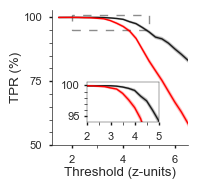

In [316]:
#TP RATE vs THRESHOLD

#main plot
ax = plt.gca()
tsplot(ax,data=tpRateCalc,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(ax,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=TWOCHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(thresholdLim)

#inset location
ax.add_patch(
    patches.Rectangle(
        (2,95), #(x,y)
        5-2, #width
        101-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

#inset
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.835, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
tsplot(axins,data=tpRateCalc,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(axins,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=TWOCHANNELCOLOR)
#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]
#ticks
plt.minorticks_on()

axins.set_xlim(2.3,5)
axins.set_xticks(np.arange(2,6,1))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(94,100.5)
axins.set_yticks(np.arange(95,102,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpThresh.svg',transparent=True)
plt.show()

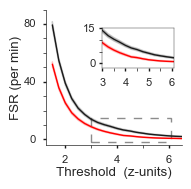

In [317]:
#FALSE STIM RATE vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=fpRateCalc,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(ax,data=fpRateCalc2,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=TWOCHANNELCOLOR)
plt.xlabel("Threshold  (z-units)")
plt.ylabel("FSR (per min)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

plt.ylim(fsRateLim)
plt.xlim(thresholdLim)

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)
#zoom 
ax.add_patch(
    patches.Rectangle(
        (3,-2), #(x,y)
        6.1-3, #width
        15+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
#inset
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.96, 0.68), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
tsplot(axins,data=fpRateCalc,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(axins,data=fpRateCalc2,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=TWOCHANNELCOLOR)

#ticks!
plt.minorticks_on()

axins.set_xlim(3,6.1)
axins.set_xticks(np.arange(3,6.1,1))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(-2,15)
axins.set_yticks(np.arange(0,16,15))
minorLocator = AutoMinorLocator(3)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fpThresh.svg',transparent=True)
plt.show()

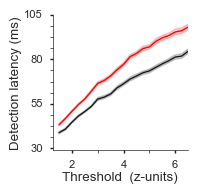

In [347]:
#DETECTION LATENCY vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=detectionLatencyCalc,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=SINGLECHANNELCOLOR)
tsplot(ax,data=detectionLatencyCalc2,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=TWOCHANNELCOLOR)
plt.xlabel("Threshold  (z-units)")
plt.ylabel("Detection latency (ms)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(30,110,25))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.xlim(thresholdLim)
plt.ylim(detectLatLim)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latThresh.svg',transparent=True)
plt.show()

# #RELATIVE DETECTION LATENCY vs THRESHOLD
# ax=plt.gca()
# tsplot(ax,data=relativeDetectionLatencyCalc*100,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=SINGLECHANNELCOLOR)
# tsplot(ax,data=relativeDetectionLatencyCalc2*100,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=TWOCHANNELCOLOR)
# plt.xlabel("Threshold (z-units)")
# plt.ylabel("Relative latency (%)")
# plt.xlim(thresholdLim)
# plt.ylim([20,45])

# #spine width
# [i.set_linewidth(0.5) for i in ax.spines.values()]

# #ticks
# ax.set_xticks(np.arange(2,7,2))
# minorLocator = AutoMinorLocator(2)
# ax.xaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
# ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

# ax.set_yticks(np.arange(20,51,15))
# minorLocator = AutoMinorLocator(3)
# ax.yaxis.set_minor_locator(minorLocator)
# ax.yaxis.tick_left()
# ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
# ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

# npl.utils.clear_right(ax)
# npl.utils.clear_top(ax)

# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/relativeLatThresh.svg',transparent=True)
# plt.show()

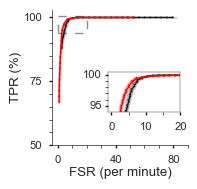

In [303]:
#TP vs FALSE STIM RATE
shade_widths = 1
ax=plt.gca()
plt.plot(est_fpr,est_tpr,color=SINGLECHANNELCOLOR)
plt.plot(est_fpr,cis_tpr[0],linestyle=':',color=SINGLECHANNELCOLOR)
plt.plot(est_fpr,cis_tpr[1],linestyle=':',color=SINGLECHANNELCOLOR)
plt.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],linewidth=shade_widths,alpha=0.2,color=SINGLECHANNELCOLOR)
plt.plot(est_fpr2,est_tpr2,color=TWOCHANNELCOLOR)
plt.plot(est_fpr2,cis_tpr2[0],linestyle=':',color=TWOCHANNELCOLOR)
plt.plot(est_fpr2,cis_tpr2[1],linestyle=':',color=TWOCHANNELCOLOR)
plt.fill_betweenx(est_tpr2,cis_fpr2[0],cis_fpr2[1],linewidth=shade_widths,alpha=0.2,color=TWOCHANNELCOLOR)
plt.xlabel("FSR (per minute)")
plt.ylabel("TPR (%)")
#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]
#ticks 
ax.set_xticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.xlim(fsRateLim)
plt.ylim(tpRateLim)

#rectangle
ax.add_patch(
    patches.Rectangle(
        (0,94), #(x,y)
        20, #width
        100.5-94,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

#inset
axins = inset_axes(parent_axes=ax,
        width=0.72,
        height=0.4,
        loc=5,
        bbox_to_anchor=(0.96, 0.43), 
        bbox_transform=ax.figure.transFigure,
        borderpad=2,
      )
#2 standard errors!
axins.plot(est_fpr,est_tpr,color=SINGLECHANNELCOLOR)
axins.plot(est_fpr,cis_tpr[0],linestyle=':',color=SINGLECHANNELCOLOR)
axins.plot(est_fpr,cis_tpr[1],linestyle=':',color=SINGLECHANNELCOLOR)
axins.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],linewidth=shade_widths,alpha=0.2,color=SINGLECHANNELCOLOR)
axins.plot(est_fpr2,est_tpr2,color=TWOCHANNELCOLOR)
axins.plot(est_fpr2,cis_tpr2[0],linestyle=':',color=TWOCHANNELCOLOR)
axins.plot(est_fpr2,cis_tpr2[1],linestyle=':',color=TWOCHANNELCOLOR)
axins.fill_betweenx(est_tpr2,cis_fpr2[0],cis_fpr2[1],linewidth=shade_widths,alpha=0.2,color=TWOCHANNELCOLOR)

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(-0.8,20)
axins.set_xticks(np.arange(0,21,10))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(94,100.5)
axins.set_yticks(np.arange(95,102,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpFsr.svg',transparent=True)
plt.show()

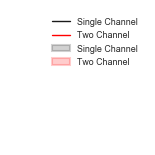

In [18]:
#Just saving the legend as a separate SVG here
#TP vs FALSE STIM RATE
ax = plt.gca()
tsplot(ax,data=tpRateCalc,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=SINGLECHANNELCOLOR,label='Single Channel')
tsplot(ax,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=TWOCHANNELCOLOR,label='Two Channel')
plt.xlabel("False stimulations per second")
plt.ylabel("True positive percentage (%)")
plt.xlim([0,0.000001])
# plt.legend(loc='lower right')
plt.ylim([0,0.000004])
# leg = plt.legend(bbox_to_anchor=(1,0.2),loc=2)
handles,labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles,labels)
plt.gca().yaxis.set_visible(False)
plt.gca().xaxis.set_visible(False)
for v in plt.gca().spines.values():
    v.set_visible(False)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/legend_lines.svg',bbox_inches='tight',transparent=True)
plt.show()

## Bottom Panel 3-5 sd comparisons

In [328]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9.6, 'axes.labelsize': 9.6, 'axes.titlesize':9.6, 'legend.fontsize': 6.4, 'ytick.labelsize': 8, 'xtick.labelsize': 8, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
saveFigs = True

SINGLECHANNELCOLOR = 'k'
SINGLECHANNELSHAPES='o'
TWOCHANNELCOLOR = 'red'
TWOCHANNELSHAPES = 'o'
alfa_2Chan = 0.01
alfa_1Chan = 0.1
tpRateLim = [50,103]
fsRateLim = [-4,65]
thresholdLim = [1.25,9.5]
detectLatLim = [29,105]

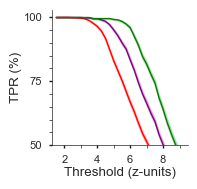

In [340]:
#TP RATE vs THRESHOLD

#main plot
ax = plt.gca()
tsplot(ax,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc.shape[0])*np.arange(0,tpRateCalc.shape[0])*0.25),color="red",label="3SD")
tsplot(ax,data=tpRateCalc4SD2,x=1.5+(np.ones(tpRateCalc4SD.shape[0])*np.arange(0,tpRateCalc4SD.shape[0])*0.25),color='purple',label="4SD")
tsplot(ax,data=tpRateCalc5SD2,x=1.5+(np.ones(tpRateCalc5SD.shape[0])*np.arange(0,tpRateCalc5SD.shape[0])*0.25),color='green',label="5SD")

plt.xlabel("Threshold (z-units)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,9.5,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(thresholdLim)

##inset location
#ax.add_patch(
#    patches.Rectangle(
#        (2.75,95), #(x,y)
#        3.75, #width
#        101-95,       #height
#        color='k',
#        lw=1,
#        ls='--',
#        alpha=0.5,
#        fill=False
#    )
#)

##inset
#axins = inset_axes(parent_axes=ax,
#                    width=0.72,
#                    height=0.4,
#                    loc=5,
#                    bbox_to_anchor=(0.85, 0.37), 
#                    bbox_transform=ax.figure.transFigure,
#                    borderpad=2,
#                 )
#tsplot(axins,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color='dimgray')
#tsplot(axins,data=tpRateCalc4SD2,x=1.5+(np.ones(tpRateCalc4SD.shape[0])*np.arange(0,tpRateCalc4SD.shape[0])*0.25),color='blue',label="4SD")
#tsplot(axins,data=tpRateCalc5SD2,x=1.5+(np.ones(tpRateCalc5SD.shape[0])*np.arange(0,tpRateCalc5SD.shape[0])*0.25),color='red',label="5SD")
##spine width
#[i.set_linewidth(0.3) for i in axins.spines.values()]
##ticks
#plt.minorticks_on()

#axins.set_xlim(2.75,3.75+2.75)
#axins.set_xticks(np.arange(2,2.75+3.75,2))
#minorLocator = AutoMinorLocator(2)
#axins.xaxis.set_minor_locator(minorLocator)
#axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
#axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

#axins.set_ylim(94,100.5)
#axins.set_yticks(np.arange(95,102,5))
#minorLocator = AutoMinorLocator(5)
#axins.yaxis.set_minor_locator(minorLocator)
#axins.yaxis.tick_left()
#axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
#axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpThresh_varyCanonical.svg',transparent=True)
plt.show()

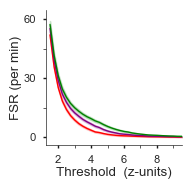

In [341]:
#FALSE STIM RATE vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=fpRateCalc2,x=1.5+(np.ones(fpRateCalc.shape[0])*np.arange(0,fpRateCalc.shape[0])*0.25),color="red",label='3SD')
tsplot(ax,data=fpRateCalc4SD2,x=1.5+(np.ones(fpRateCalc4SD.shape[0])*np.arange(0,fpRateCalc4SD.shape[0])*0.25),color="purple",label='4SD')
tsplot(ax,data=fpRateCalc5SD2,x=1.5+(np.ones(fpRateCalc5SD.shape[0])*np.arange(0,fpRateCalc5SD.shape[0])*0.25),color="green",label='5SD')
plt.xlabel("Threshold  (z-units)")
plt.ylabel("FSR (per min)")

#plt.legend()

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

plt.ylim(fsRateLim)
plt.xlim(thresholdLim)

#ticks
ax.set_xticks(np.arange(2,9.5,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(0,65,30))
minorLocator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)
##zoom 
#ax.add_patch(
#    patches.Rectangle(
#        (3,-2), #(x,y)
#        6.1-3, #width
#        15+2,       #height
#        color='k',
#        lw=1,
#        ls='--',
#        alpha=0.5,
#        fill=False
#    )
#)
# #inset
# axins = inset_axes(parent_axes=ax,
#                     width=0.72,
#                     height=0.4,
#                     loc=5,
#                     bbox_to_anchor=(0.96, 0.68), 
#                     bbox_transform=ax.figure.transFigure,
#                     borderpad=2,
#                   )
# tsplot(axins,data=fpRateCalc,x=1.5+(np.ones(fpRateCalc2.shape[0])*np.arange(0,fpRateCalc2.shape[0])*0.25),color=SINGLECHANNELCOLOR)
# tsplot(axins,data=fpRateCalc2,x=1.5+(np.ones(fpRateCalc2.shape[0])*np.arange(0,fpRateCalc2.shape[0])*0.25),color=TWOCHANNELCOLOR)

# #ticks!
# plt.minorticks_on()

# axins.set_xlim(3,6.1)
# axins.set_xticks(np.arange(3,6.1,1))
# minorLocator = AutoMinorLocator(2)
# axins.xaxis.set_minor_locator(minorLocator)
# axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
# axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

# axins.set_ylim(-2,15)
# axins.set_yticks(np.arange(0,16,15))
# minorLocator = AutoMinorLocator(3)
# axins.yaxis.set_minor_locator(minorLocator)
# axins.yaxis.tick_left()
# axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
# axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

# #spine width
# [i.set_linewidth(0.3) for i in axins.spines.values()]

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fpThresh_varyCanonical.svg',transparent=True)
plt.show()

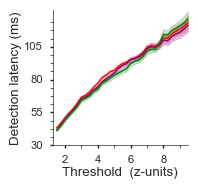

In [343]:
#DETECTION LATENCY vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=detectionLatencyCalc2,x=1.5+(np.ones(detectionLatencyCalc.shape[0])*np.arange(0,detectionLatencyCalc.shape[0])*0.25),color='red')
tsplot(ax,data=detectionLatencyCalc4SD2,x=1.5+(np.ones(detectionLatencyCalc4SD.shape[0])*np.arange(0,detectionLatencyCalc4SD.shape[0])*0.25),color='purple')
tsplot(ax,data=detectionLatencyCalc5SD2,x=1.5+(np.ones(detectionLatencyCalc5SD.shape[0])*np.arange(0,detectionLatencyCalc5SD.shape[0])*0.25),color='green')
plt.xlabel("Threshold  (z-units)")
plt.ylabel("Detection latency (ms)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,9.5,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(30,110,25))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.xlim(thresholdLim)
# plt.ylim(detectLatLim)
# plt.xlim([6,10.5])
# plt.ylim([40,70])
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latThresh.svg',transparent=True)
plt.show()

# #RELATIVE DETECTION LATENCY vs THRESHOLD
# ax=plt.gca()
# tsplot(ax,data=relativedetectionLatencyencyCalc*100,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=SINGLECHANNELCOLOR)
# tsplot(ax,data=relativedetectionLatencyencyCalc2*100,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color=TWOCHANNELCOLOR)
# plt.xlabel("Threshold (z-units)")
# plt.ylabel("Relative latency (%)")
# plt.xlim(thresholdLim)
# plt.ylim([20,45])

# #spine width
# [i.set_linewidth(0.5) for i in ax.spines.values()]

# #ticks
# ax.set_xticks(np.arange(2,7,2))
# minorLocator = AutoMinorLocator(2)
# ax.xaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
# ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

# ax.set_yticks(np.arange(20,51,15))
# minorLocator = AutoMinorLocator(3)
# ax.yaxis.set_minor_locator(minorLocator)
# ax.yaxis.tick_left()
# ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
# ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

# npl.utils.clear_right(ax)
# npl.utils.clear_top(ax)
# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/relativeLatThresh.svg',transparent=True)
# plt.show()

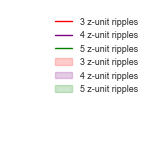

In [344]:
#Just saving the legend as a separate SVG here
#TP vs FALSE STIM RATE
ax = plt.gca()
tsplot(ax,data=tpRateCalc,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color='red',label='3 z-unit ripples')
tsplot(ax,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color='purple',label='4 z-unit ripples')
tsplot(ax,data=tpRateCalc2,x=1.5+(np.ones(tpRateCalc2.shape[0])*np.arange(0,tpRateCalc2.shape[0])*0.25),color='green',label='5 z-unit ripples')

plt.xlabel("False stimulations per second")
plt.ylabel("True positive percentage (%)")
plt.xlim([0,0.000001])
# plt.legend(loc='lower right')
plt.ylim([0,0.000004])
# leg = plt.legend(bbox_to_anchor=(1,0.2),loc=2)
handles,labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles,labels)
plt.gca().yaxis.set_visible(False)
plt.gca().xaxis.set_visible(False)
for v in plt.gca().spines.values():
    v.set_visible(False)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/legend_lines_varyCanonical.svg',bbox_inches='tight',transparent=True)
plt.show()

# Final Figure

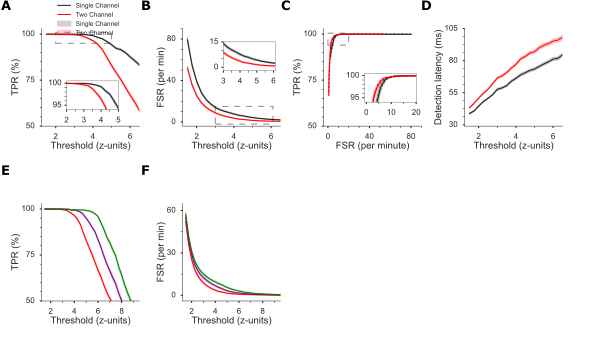

In [348]:
#create new SVG figure
fig = sg.SVGFigure("6.25in", "3.67in")

#load matplotlib-generated figures
tpThresh = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpThresh.svg")
fsrThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fpThresh.svg')
relDetThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/relativeLatThresh.svg')
latThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latThresh.svg')
tpLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latTP.svg')
fsrLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latFPStim.svg')
tpFsp = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpFsr.svg')
legend = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/legend.svg')
legend_lines = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/legend_lines.svg")
tpThresh_varyCanonical = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpThresh_varyCanonical.svg")
fsrThresh_varyCanonical = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fpThresh_varyCanonical.svg')

#get the plot objects
tpThreshPlot1 = tpThresh.getroot()
fsrThreshPlot2 = fsrThresh.getroot()
relDetThreshPlot4 = relDetThresh.getroot()
latThreshPlot3 = latThresh.getroot()
tpLatPlot1 = tpLat.getroot()
fsrLatPlot2 = fsrLat.getroot()
tpFspPlot3 = tpFsp.getroot()
legendPlot = legend.getroot()
legendLinesPlot = legend_lines.getroot()
tpThresh_varyCanonical = tpThresh_varyCanonical.getroot()
fsrThresh_varyCanonical = fsrThresh_varyCanonical.getroot()

plotspacing = 141
plotInitLoc = 26
plotVerticalDisplacement = 16
plotSecondRow = 175+16
textspacing = 140
textInitLoc = 1
textVerticalDisplacement = 10
textSecondRow = 175

#top row
tpThreshPlot1.moveto(26, plotVerticalDisplacement, scale=1)
fsrThreshPlot2.moveto(plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)
tpFspPlot3.moveto(plotspacing+plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)
latThreshPlot3.moveto(plotspacing+plotspacing+plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)

#bottom row
tpThresh_varyCanonical.moveto(plotInitLoc, plotSecondRow, scale=1)
fsrThresh_varyCanonical.moveto(plotspacing+plotInitLoc, plotSecondRow, scale=1)

legendLinesPlot.moveto(20,-10,scale=1)

#add text labels
##Top Panel
txt1 = sg.TextElement(1,textVerticalDisplacement, "A", size=13, weight="bold")
txt2 = sg.TextElement(textspacing+textInitLoc,textVerticalDisplacement, "B", size=13, weight="bold")
txt3 = sg.TextElement(textspacing+textspacing+textInitLoc,textVerticalDisplacement,"C", size=13, weight='bold')
txt4 = sg.TextElement(textspacing+textspacing+textspacing+textInitLoc,textVerticalDisplacement,"D", size=13, weight='bold')
##Bottom :Panel
txt5 = sg.TextElement(1,textSecondRow, "E", size=13, weight="bold")
txt6 = sg.TextElement(textspacing+textInitLoc,textSecondRow, "F", size=13, weight="bold")

# append plots and labels to figure
fig.append([tpThreshPlot1, fsrThreshPlot2, latThreshPlot3, tpFspPlot3, tpThresh_varyCanonical,fsrThresh_varyCanonical,\
           legendLinesPlot])
fig.append([txt1, txt2, txt3, txt4, txt5, txt6])

fig.save("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png'))

Combine legend lines on inkscape then generate final figure

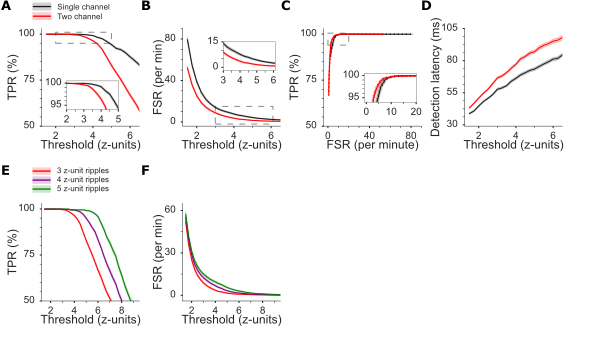

In [352]:
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
os.system("inkscape --export-pdf=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.pdf /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png'))